# Programación lineal 

### ¿Qué es?

La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominadas función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: center"  src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="225px" height="80px" />

### Elementos principales 

* **Función objetivo:** 
Es la función a optimizar, ya sea maximizando o minimizando su resultado.
* **Restricciones:** 
Son las condiciones que deben cumplirse al optimizar la función objetivo. Puede tratarse de ecuaciones o inecuaciones algebraicas.

### Importancia

La programación lineal es importante porque permite tomar decisiones objetivas, optimizar procesos y recursos, aumentar la eficiencia y encontrar soluciones innovadoras.

Estas son algunas de las razones por la que debes de considerar su uso:

* **Toma de decisiones:** Permite tomar decisiones objetivas basadas en datos, gracias a que utiliza modelos matemáticos para representar de manera clara la situación a resolver y encuentra la mejor solución posible.
* **Optimización:** Se utiliza para optimizar procesos y recursos en una gran variedad de campos, como la producción, la distribución, la planificación o la gestión de proyectos. De esta forma, se maximizan ganancias o se minimizan costos.
* **Eficiencia:** Permite hacer un uso eficiente de los recursos, al planificar y asignar los recursos de manera óptima. 
* **Innovación:** Permite resolver problemas complejos y encontrar soluciones innovadoras. 

### Optimización de inversión en bonos

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

**Solución:**
Se desea maximizar el retorno de inversión, esto es
$$
\max_{x_i}0.0865x_1+.0950x_2+.1000x_3+.0875x_4+.0925x_5+.0900x_6,
$$
para $i=\{1,2,\dots,6\}$; o de forma equivalente
$$
\min_{x_i}-.0865x_1-.0950x_2-.1000x_3-.0875x_4-.0925x_5-.0900x_6.
$$
Cumpliendo con las siguientes restricciones
* Años de madurez: $x_1+x_2+x_4+x_6\geq(750000)0.5\equiv -x_1-x_2-x_4-x_6\leq-(750000)0.5$
* Riesgo: $x_2+x_3+x_5\leq(750000)0.35$
* Money disponible: $x_1+x_2+x_3+x_4+x_5+x_6=750000$. Para $0\leq(750000)0.25$

In [10]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

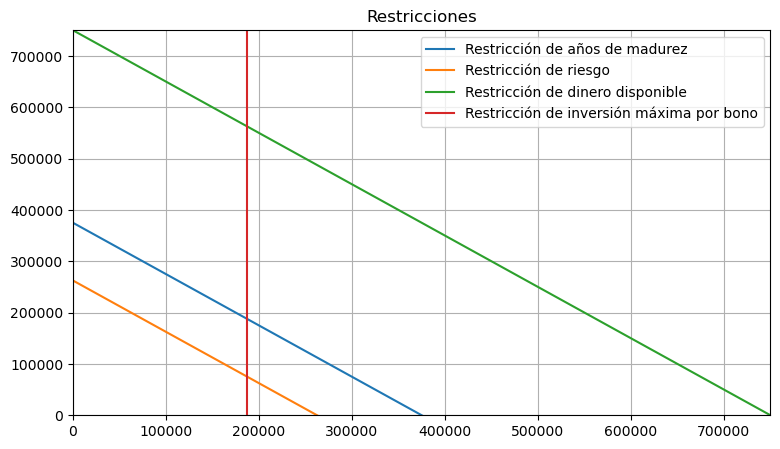

In [27]:
# Restricciones
def restricciones():
    plt.figure(figsize=(9, 5))

    # Años de madurez
    x = np.linspace(0, 750000, 100)
    r1 = 750000*0.5 - x
    plt.plot(x, r1, label='Restricción de años de madurez')

    # Riesgo
    r2 = 750000*0.35 - x
    plt.plot(x, r2, label='Restricción de riesgo')

    # Dinero disponible
    r3 = 750000 - x
    plt.plot(x, r3, label='Restricción de dinero disponible')

    # Inversión máxima por bono
    plt.plot([rango[1], rango[1]], [0, 750000], label='Restricción de inversión máxima por bono')

    plt.title('Restricciones')
    plt.legend()
    plt.grid()
    plt.xlim(0, 750000)
    plt.ylim(0, 750000)
# Graficar restricciones
restricciones()

In [25]:
# Optimización
c = np.array([-0.0865, -0.095, -0.1, -0.0875, -0.0925, -0.09])  # Coeficientes de la función objetivo
A = np.array([[-1, -1, 0, -1, 0, -1],   
              [0, 1, 1, 0, 1, 0],       # Restricción de riesgo
              [1, 1, 1, 1, 1, 1]])      # Restricción de dinero disponible
b = np.array([-750000*0.5,  # Restricción de años de madurez
              750000*0.35,  # Restricción de riesgo
              750000])      # Restricción de dinero disponible
rango = (0, 750000*0.25)    # Restricción de inversión máxima por bono
opt.linprog(c,A,b,Ae,be,rango)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -68887.5
              x: [ 1.125e+05  7.500e+04  1.875e+05  1.875e+05  0.000e+00
                   1.875e+05]
            nit: 3
          lower:  residual: [ 1.125e+05  7.500e+04  1.875e+05  1.875e+05
                              0.000e+00  1.875e+05]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              2.500e-03  0.000e+00]
          upper:  residual: [ 7.500e+04  1.125e+05  0.000e+00  0.000e+00
                              1.875e+05  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00 -5.000e-03 -1.000e-03
                              0.000e+00 -3.500e-03]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-0.000e+00]
        ineqlin:  residual: [ 1.875e+05  0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -8.500e-03 -8.650e-02]
 mip_node_count: 0
 mi

**Resultado:**

El retorno máximo es de $\$68887.5$ invirtiendo:
* en $A_1$ $\$112,500$,
* en $A_2$ $\$75,000$,
* en $A_3$, $A_4$ y $A_6$ $\$187,500$
Excediendo $187500 en bonos con 10 años o más de madurez.

El atributo `fun` de lo que regresa la función `linprog` es el resultado óptimo y `x` los valores de las variables que lo generan. Ah sí, el atributo `ineqlin` tiene un atributo de `residuals` que representa el excedente de las restricciones de desigualdad.

In [6]:
import pandas as pd
import yfinance as yf

In [11]:
tickers=['NVDA','TSLA','META']
f_inicial='2017-10-01'
f_final='2023-10-01'

datos=yf.download(tickers,f_inicial,f_final)['Adj Close']
datos.head()

[*********************100%%**********************]  3 of 3 completed


,META,NVDA,TSLA
Date,,,
2017-10-02,169.290375,44.246044,22.768667
2017-10-03,169.779861,44.337490,23.209333
2017-10-04,168.241486,44.708275,23.667334
2017-10-05,171.058517,44.683556,23.688667
2017-10-06,172.047455,44.814560,23.792000


<Axes: xlabel='Date'>

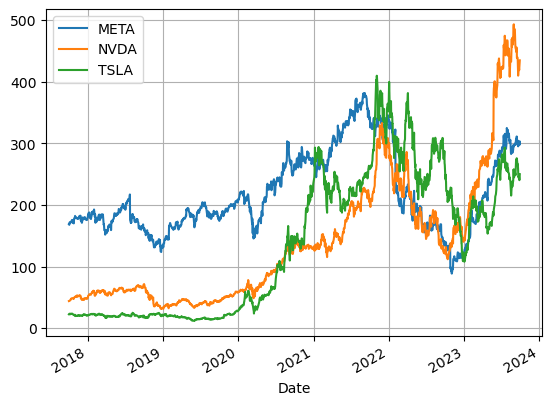

In [12]:
datos.plot(grid=True)

In [13]:
R=(datos-datos.shift())/datos.shift()
R.dropna(inplace=True) #eliminamos las filas con NaN y sobreescribimos la variable
R.head()

,META,NVDA,TSLA
Date,,,
2017-10-03,0.002891,0.002067,0.019354
2017-10-04,-0.009061,0.008363,0.019733
2017-10-05,0.016744,-0.000553,0.000901
2017-10-06,0.005781,0.002932,0.004362
2017-10-09,0.001568,0.022559,-0.039061


<Axes: xlabel='Date'>

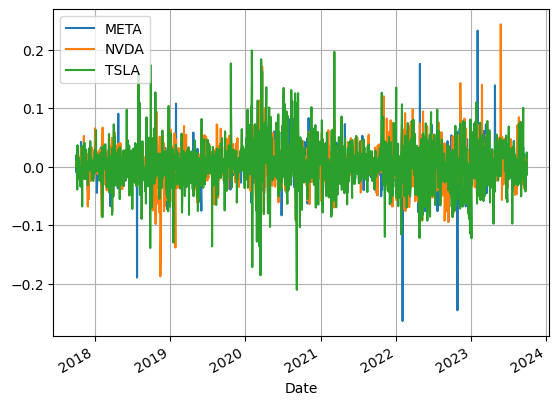

In [14]:
R.plot(grid=True)

In [15]:
m=R.mean()
s=R.std()
m,s

(META    0.000746
 NVDA    0.002038
 TSLA    0.002388
 dtype: float64,
 META    0.026827
 NVDA    0.032306
 TSLA    0.039986
 dtype: float64)

In [16]:
#Primer marca simulado: META 30 días con 10000 escenarios
R_META=np.random.normal(m["META"],s["META"],(30,10000))
R_META

array([[-0.02135806,  0.02365457,  0.04166904, ...,  0.01496031,
        -0.01403718,  0.00522928],
       [ 0.06624576, -0.01083129, -0.05794685, ..., -0.02288098,
        -0.00286639, -0.01934736],
       [-0.00204879,  0.03619041,  0.03883828, ..., -0.04039465,
        -0.05236945,  0.04886191],
       ...,
       [ 0.03890056, -0.01287609,  0.02801336, ...,  0.01132269,
        -0.00939964, -0.02315179],
       [ 0.03145426,  0.023303  ,  0.01391291, ...,  0.01139899,
         0.02701329, -0.00541939],
       [-0.03068789,  0.00885965,  0.01496399, ..., -0.03198494,
         0.04155232,  0.06262568]])

In [17]:
#funcion para simular rendimientos futuros 
def rendimientos(m,s,start,dias,N):
    Rnormal=np.random.normal(m,s,(dias,N)) #'N' escenarios de rendimiento simulados con 'dias'rendimientos simulados 
                                            # con media 'm', desviacion estandar 's'
    fechas=pd.date_range(start,periods=dias) #Obtenemos las fechas para los dias simulados a partir de 'start'
    return pd.DataFrame(Rnormal,index=fechas)

In [18]:
start='2023-10-02'
dias=30
N=10000

#simulamos los rendimientos para todas las marcas
R_META=rendimientos(m['META'],s['META'],start,dias,N)
R_NVDA=rendimientos(m['NVDA'],s['NVDA'],start,dias,N)
R_TSLA=rendimientos(m['TSLA'],s['TSLA'],start,dias,N)

In [19]:
# Último precio conocido
datos['META'].iloc[-1]   #iloc --> especifica el renglón por su posición (no por su nombre)

299.8918151855469

In [20]:
# Proyección de los precios
S_META=datos['META'].iloc[-1]*(R_META+1).cumprod()   #cumprod  --> producto acumulado
S_NVDA=datos['NVDA'].iloc[-1]*(R_NVDA+1).cumprod()
S_TSLA=datos['TSLA'].iloc[-1]*(R_TSLA+1).cumprod()

In [21]:
#Umnral
U=datos.iloc[-1]*1.04 #Vemos cuántos de los escenarios supera el 4% del último precio conocido 
U

META    311.887488
NVDA    452.328589
TSLA    260.228801
Name: 2023-09-29 00:00:00, dtype: float64

In [22]:
#Variable de Bernoulli
B_META=S_META>U['META']
B_NVDA=S_NVDA>U['NVDA']
B_TSLA=S_TSLA>U['TSLA']

<Axes: >

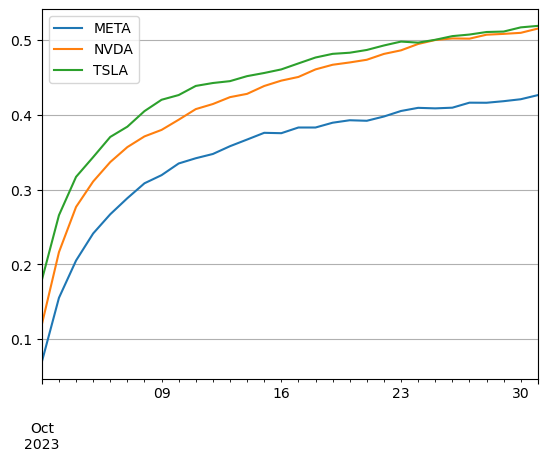

In [23]:
#Cuántos escenarios cumplen con la condición en relación a los simulados
P_META=B_META.mean(axis=1)
P_META.plot(grid=True,label='META',legend=True)

P_NVDA=B_NVDA.mean(axis=1)
P_NVDA.plot(grid=True,label='NVDA',legend=True)

P_TSLA=B_TSLA.mean(axis=1)
P_TSLA.plot(grid=True,label='TSLA',legend=True)